## INTRODUÇÃO

**Este projeto tem como objetivo construir um modelo preditivo para identificar a probabilidade de um paciente apresentar doenças cardíacas com base em indicadores de saúde (como colesterol, pressão arterial e frequência cardíaca). 
Através da análise estatística e do treinamento de modelos de Inteligência Artificial, exploramos quais variáveis possuem maior correlação com problemas cardíacos, oferecendo uma ferramenta de suporte à decisão baseada em dados.**

**DataSet:** synthetic_heart_disease_dataset.csv from Kaggle

## ANÁLISE DOS DADOS

In [5]:
#Importando as bibiliotecas que serão usadas

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# Carregando o arquivo CSV

heart = pd.read_csv(r'C:\Users\Rodrigo Lapsky\Documents\datascience\heartdesiese\synthetic_heart_disease_dataset.csv')


In [7]:
# Verificando as primeiras linhas do DataFrame


heart.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.40,Never,NaN,Sedentary,Healthy,Medium,0,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.00,Never,Low,Active,Average,High,1,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.30,Never,NaN,Moderate,Average,Medium,0,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.40,Never,Moderate,Moderate,Average,Low,0,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.50,Current,NaN,Sedentary,Healthy,Low,1,1,0,0,0,164,67,108,116,220,1


In [8]:
# Verificando as dimensões do arquivo.

heart.shape

(50000, 21)

In [9]:
# Verificando informações do arquivo

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  object 
 6   Alcohol_Intake         29891 non-null  object 
 7   Physical_Activity      50000 non-null  object 
 8   Diet                   50000 non-null  object 
 9   Stress_Level           50000 non-null  object 
 10  Hypertension           50000 non-null  int64  
 11  Diabetes               50000 non-null  int64  
 12  Hyperlipidemia         50000 non-null  int64  
 13  Family_History         50000 non-null  int64  
 14  Previous_Heart_Attack  50000 non-null  int64  
 15  Sy

In [10]:
# Verificando se há linhas duplicadas

heart.duplicated().sum()

np.int64(0)

In [11]:
# Verificando se há valores nulos (dados missing)

heart.isnull().sum()

Age                          0
Gender                       0
Weight                       0
Height                       0
BMI                          0
Smoking                      0
Alcohol_Intake           20109
Physical_Activity            0
Diet                         0
Stress_Level                 0
Hypertension                 0
Diabetes                     0
Hyperlipidemia               0
Family_History               0
Previous_Heart_Attack        0
Systolic_BP                  0
Diastolic_BP                 0
Heart_Rate                   0
Blood_Sugar_Fasting          0
Cholesterol_Total            0
Heart_Disease                0
dtype: int64

In [12]:
# Retirando a coluna com valores nulos

heart = heart.dropna(axis=1)

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  object 
 6   Physical_Activity      50000 non-null  object 
 7   Diet                   50000 non-null  object 
 8   Stress_Level           50000 non-null  object 
 9   Hypertension           50000 non-null  int64  
 10  Diabetes               50000 non-null  int64  
 11  Hyperlipidemia         50000 non-null  int64  
 12  Family_History         50000 non-null  int64  
 13  Previous_Heart_Attack  50000 non-null  int64  
 14  Systolic_BP            50000 non-null  int64  
 15  Di

In [14]:
# Total de valores únicos de cada variável


valores_unicos = []
for i in heart.columns[0:21].tolist():
    print(i, ':', len(heart[i].astype(str).value_counts()))
    valores_unicos.append(len(heart[i].astype(str).value_counts()))

Age : 50
Gender : 2
Weight : 70
Height : 50
BMI : 221
Smoking : 3
Physical_Activity : 3
Diet : 3
Stress_Level : 3
Hypertension : 2
Diabetes : 2
Hyperlipidemia : 2
Family_History : 2
Previous_Heart_Attack : 2
Systolic_BP : 80
Diastolic_BP : 60
Heart_Rate : 50
Blood_Sugar_Fasting : 110
Cholesterol_Total : 150
Heart_Disease : 2


In [15]:
# Visualizando algumas medidas estatisticas.

heart.describe()

,Age,Weight,Height,BMI,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,54.46,84.55,174.46,28.98,0.30,0.20,0.25,0.40,0.10,139.30,89.53,84.45,124.49,224.56,0.46
std,14.44,20.21,14.42,6.37,0.46,0.40,0.43,0.49,0.30,23.08,17.26,14.49,31.69,43.16,0.50
min,30.00,50.00,150.00,18.00,0.00,0.00,0.00,0.00,0.00,100.00,60.00,60.00,70.00,150.00,0.00
25%,42.00,67.00,162.00,23.50,0.00,0.00,0.00,0.00,0.00,119.00,75.00,72.00,97.00,187.00,0.00
50%,54.00,85.00,174.00,29.00,0.00,0.00,0.00,0.00,0.00,139.00,90.00,85.00,125.00,225.00,0.00
75%,67.00,102.00,187.00,34.50,1.00,0.00,1.00,1.00,0.00,159.00,104.00,97.00,152.00,262.00,1.00
max,79.00,119.00,199.00,40.00,1.00,1.00,1.00,1.00,1.00,179.00,119.00,109.00,179.00,299.00,1.00


## GRÁFICOS

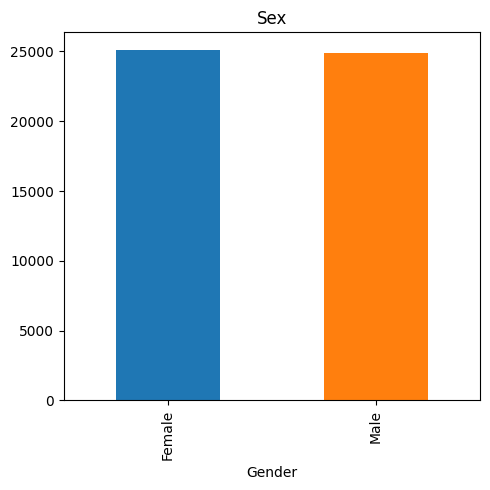

In [16]:
# Visualizando através do gráfico

heart.Gender.value_counts().plot(kind='bar', title='Sex', color=plt.get_cmap('tab10').colors);


In [17]:
# Quantidade de observações por Sexo

heart.groupby(['Gender']).size()

Gender
Female    25110
Male      24890
dtype: int64

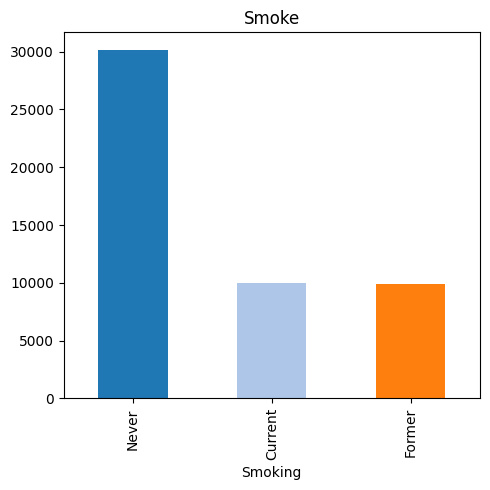

In [18]:
# Visualizando através do gráfico

heart.Smoking.value_counts().plot(kind='bar', title='Smoke', color=plt.get_cmap('tab20').colors);


In [19]:
# Quantidade de observações por tabagismo

heart.groupby(['Smoking']).size()

Smoking
Current     9965
Former      9875
Never      30160
dtype: int64

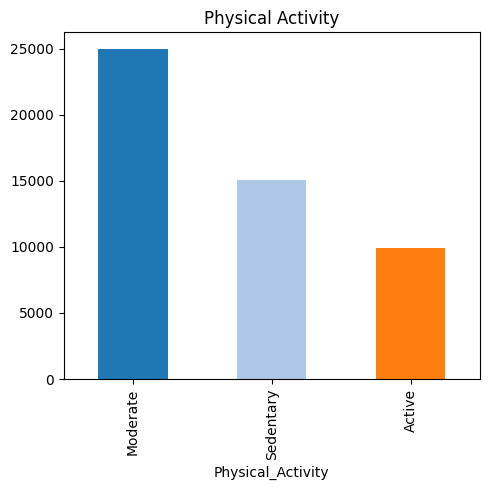

In [20]:
# Visualizando através do gráfico

heart.Physical_Activity.value_counts().plot(kind='bar', title='Physical Activity', color=plt.get_cmap('tab20').colors);


In [21]:
# Quantidade de observações por atividade física

heart.groupby(['Physical_Activity']).size()

Physical_Activity
Active        9947
Moderate     24976
Sedentary    15077
dtype: int64

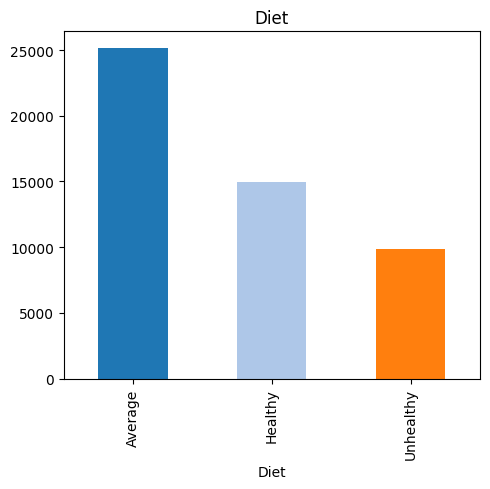

In [22]:
# Visualizando através do gráfico

heart.Diet.value_counts().plot(kind='bar', title='Diet', color=plt.get_cmap('tab20').colors);


In [23]:
# Quantidade de observações por dieta

heart.groupby(['Diet']).size()

Diet
Average      25169
Healthy      14975
Unhealthy     9856
dtype: int64

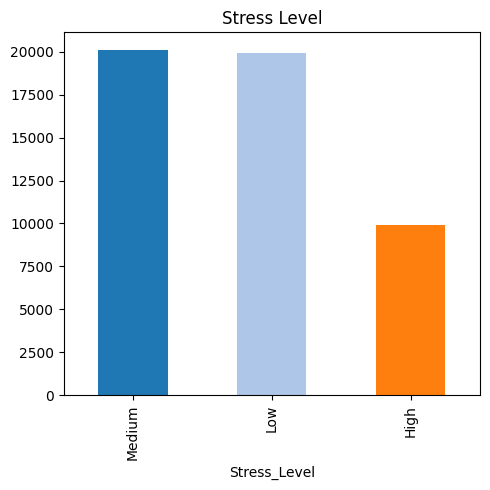

In [24]:
# Visualizando através do gráfico

heart.Stress_Level.value_counts().plot(kind='bar', title='Stress Level', color=plt.get_cmap('tab20').colors);


In [25]:
# Quantidade de observações por nível de estresse

heart.groupby(['Stress_Level']).size()

Stress_Level
High       9926
Low       19941
Medium    20133
dtype: int64

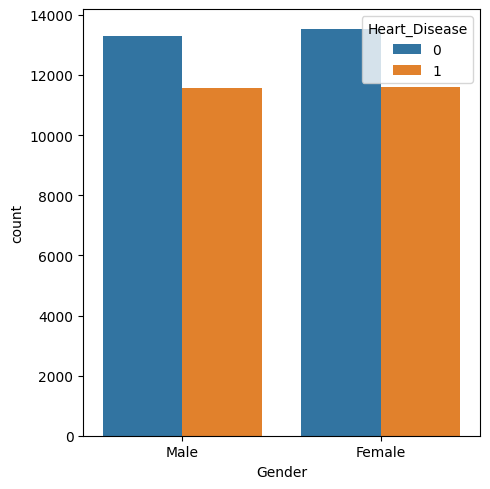

In [26]:
# Visualizando gráfico de doenças cardíacas por sexo

sns.countplot(data=heart, x= 'Gender', hue='Heart_Disease')
plt.show()

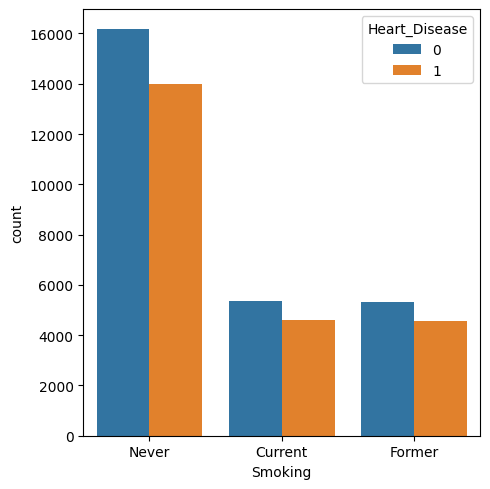

In [27]:
# Visualizando gráfico de doenças cardíacas por tabagismo

sns.countplot(data=heart, x= 'Smoking', hue='Heart_Disease')
plt.show()

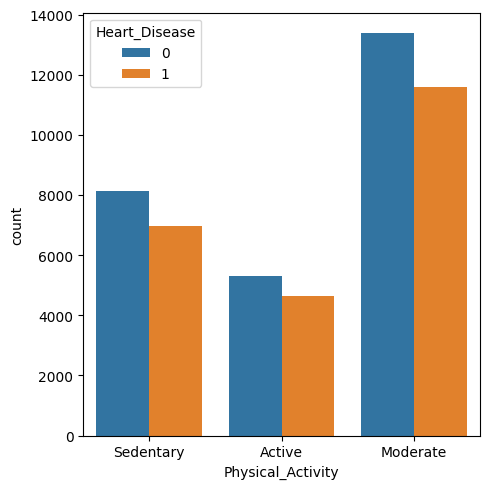

In [28]:
# Visualizando gráfico de doenças cardíacas por atividade física

sns.countplot(data=heart, x= 'Physical_Activity', hue='Heart_Disease')
plt.show()

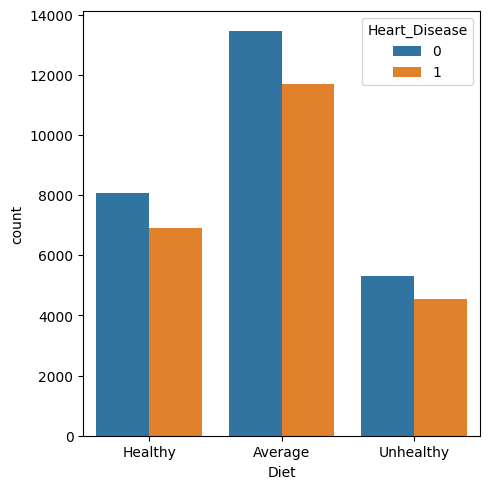

In [29]:
# Visualizando gráfico de doenças cardíacas por dieta

sns.countplot(data=heart, x= 'Diet', hue='Heart_Disease')
plt.show()

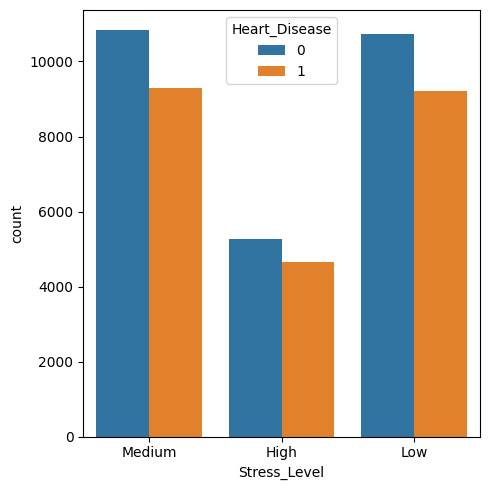

In [30]:
# Visualizando gráfico de doenças cardíacas por nível de estresse

sns.countplot(data=heart, x= 'Stress_Level', hue='Heart_Disease')
plt.show()

In [31]:
# Convertendo as variaveis do tipo Object para Category

heart['Gender'] = heart['Gender'].astype('category')
heart['Smoking'] = heart['Smoking'].astype('category')
heart['Diet'] = heart['Diet'].astype('category')
heart['Stress_Level'] = heart['Stress_Level'].astype('category')
heart['Physical_Activity'] = heart['Physical_Activity'].astype('category')



In [32]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    50000 non-null  int64   
 1   Gender                 50000 non-null  category
 2   Weight                 50000 non-null  int64   
 3   Height                 50000 non-null  int64   
 4   BMI                    50000 non-null  float64 
 5   Smoking                50000 non-null  category
 6   Physical_Activity      50000 non-null  category
 7   Diet                   50000 non-null  category
 8   Stress_Level           50000 non-null  category
 9   Hypertension           50000 non-null  int64   
 10  Diabetes               50000 non-null  int64   
 11  Hyperlipidemia         50000 non-null  int64   
 12  Family_History         50000 non-null  int64   
 13  Previous_Heart_Attack  50000 non-null  int64   
 14  Systolic_BP            50000 non-null 

In [33]:
#carregar variaveis para plot

variaveis_numericas=[]
for i in heart.columns[0:20].tolist():
    if heart.dtypes[i] == 'int64' or heart.dtypes[i] =='float64':
        variaveis_numericas.append(i)


In [34]:
variaveis_numericas

['Age',
 'Weight',
 'Height',
 'BMI',
 'Hypertension',
 'Diabetes',
 'Hyperlipidemia',
 'Family_History',
 'Previous_Heart_Attack',
 'Systolic_BP',
 'Diastolic_BP',
 'Heart_Rate',
 'Blood_Sugar_Fasting',
 'Cholesterol_Total',
 'Heart_Disease']

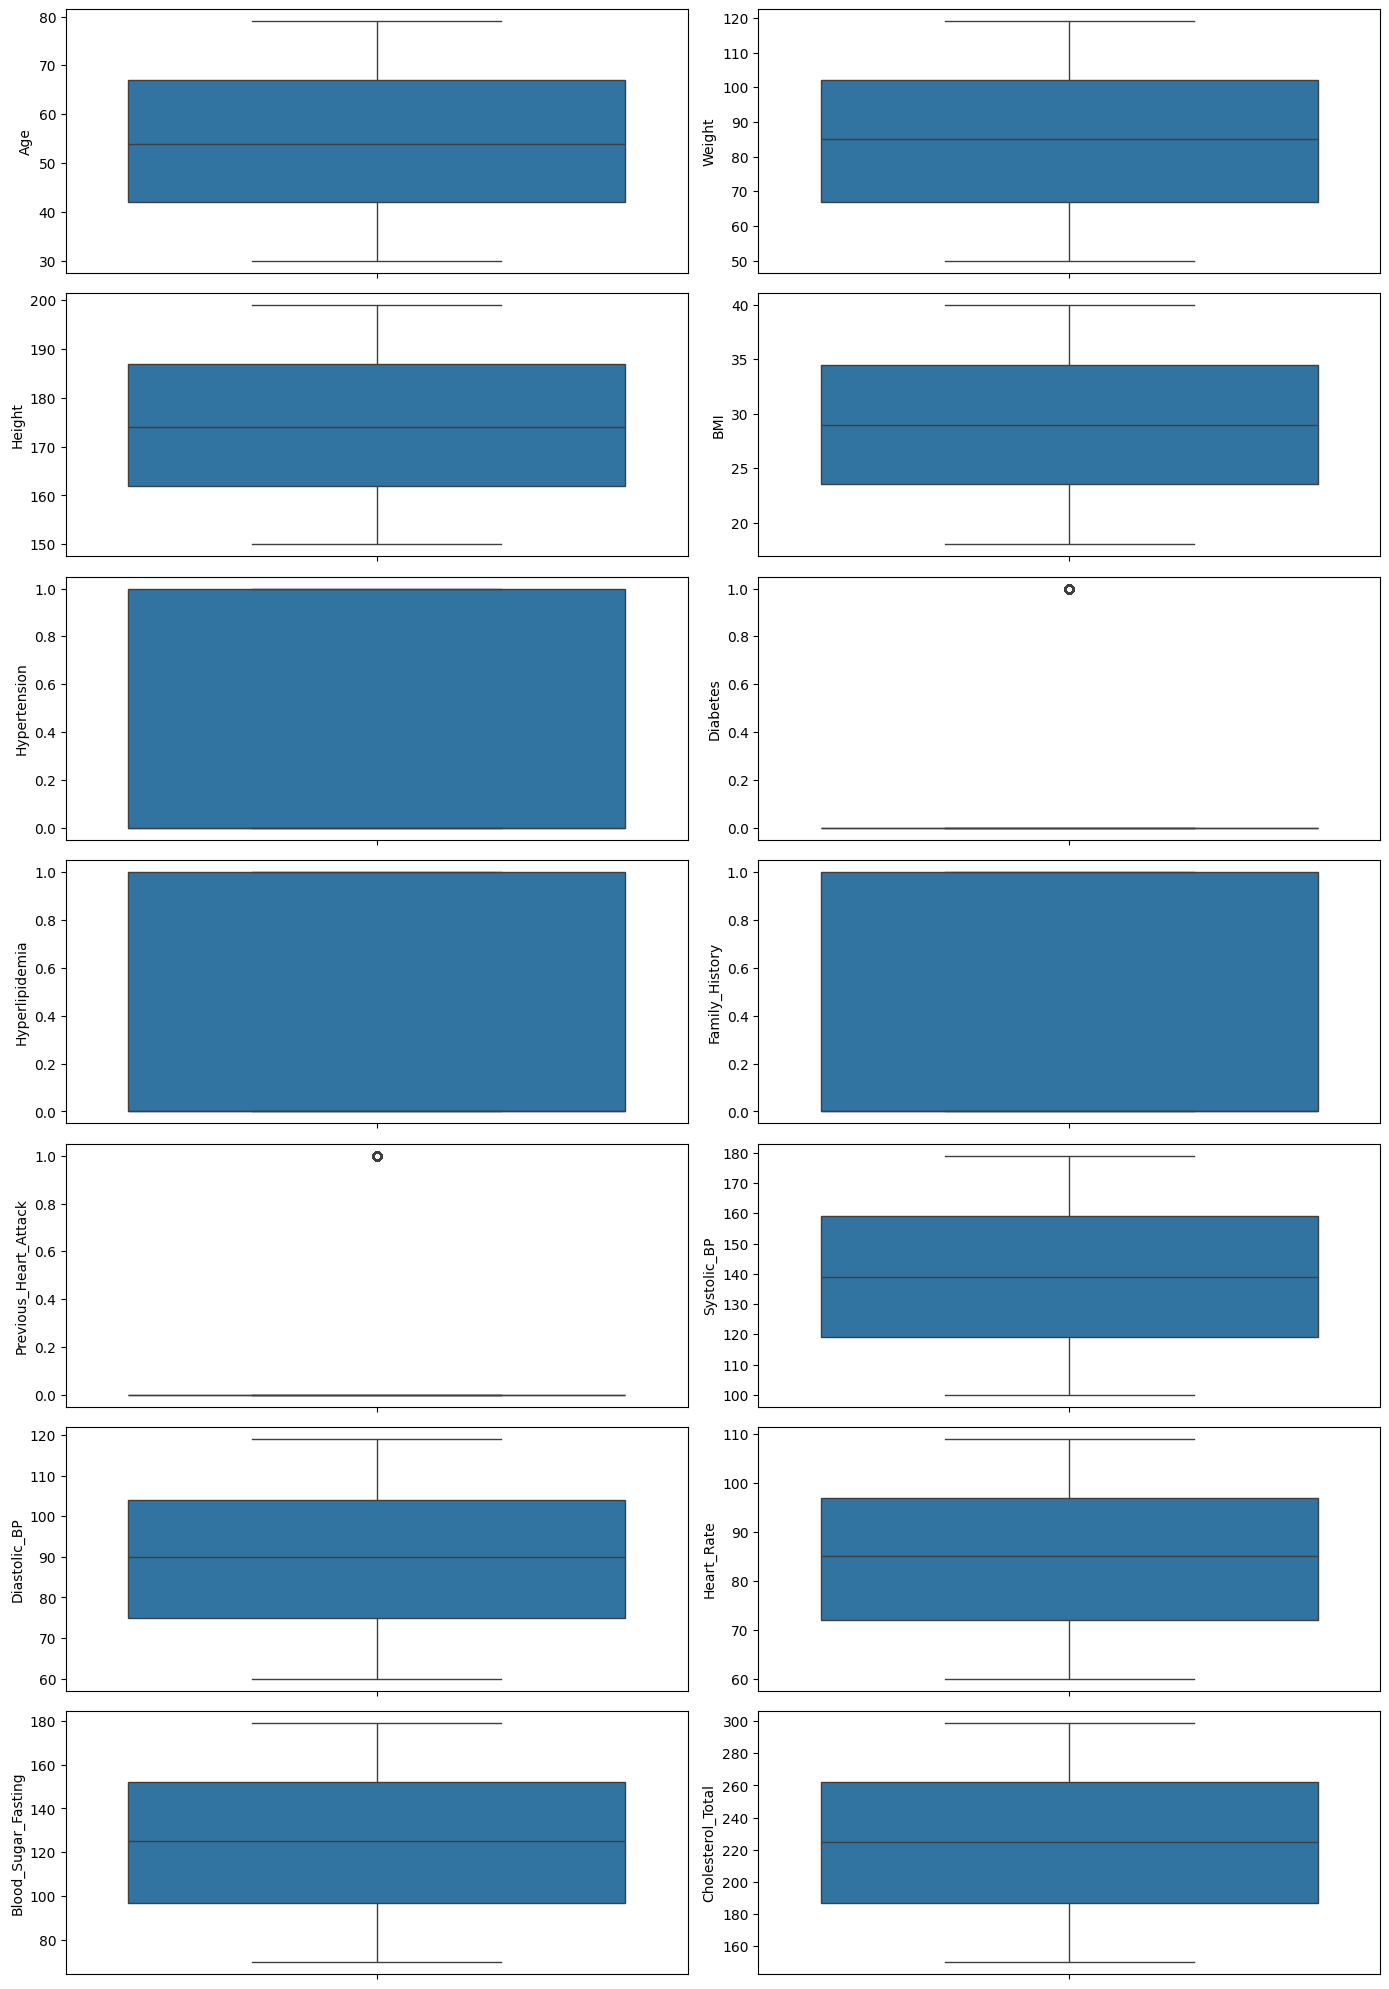

In [35]:
# Avaliando cada uma dessas variaveis dentro do contexto dos dados para saber se precisamos trata-las como outlier


plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7,2)

linha = 0
coluna = 0
for i in variaveis_numericas[:14]: 
    sns.boxplot(data=heart, y=i, ax=axes[linha][coluna])
    coluna +=1
    if coluna==2:
        linha+=1
        coluna=0

plt.show()

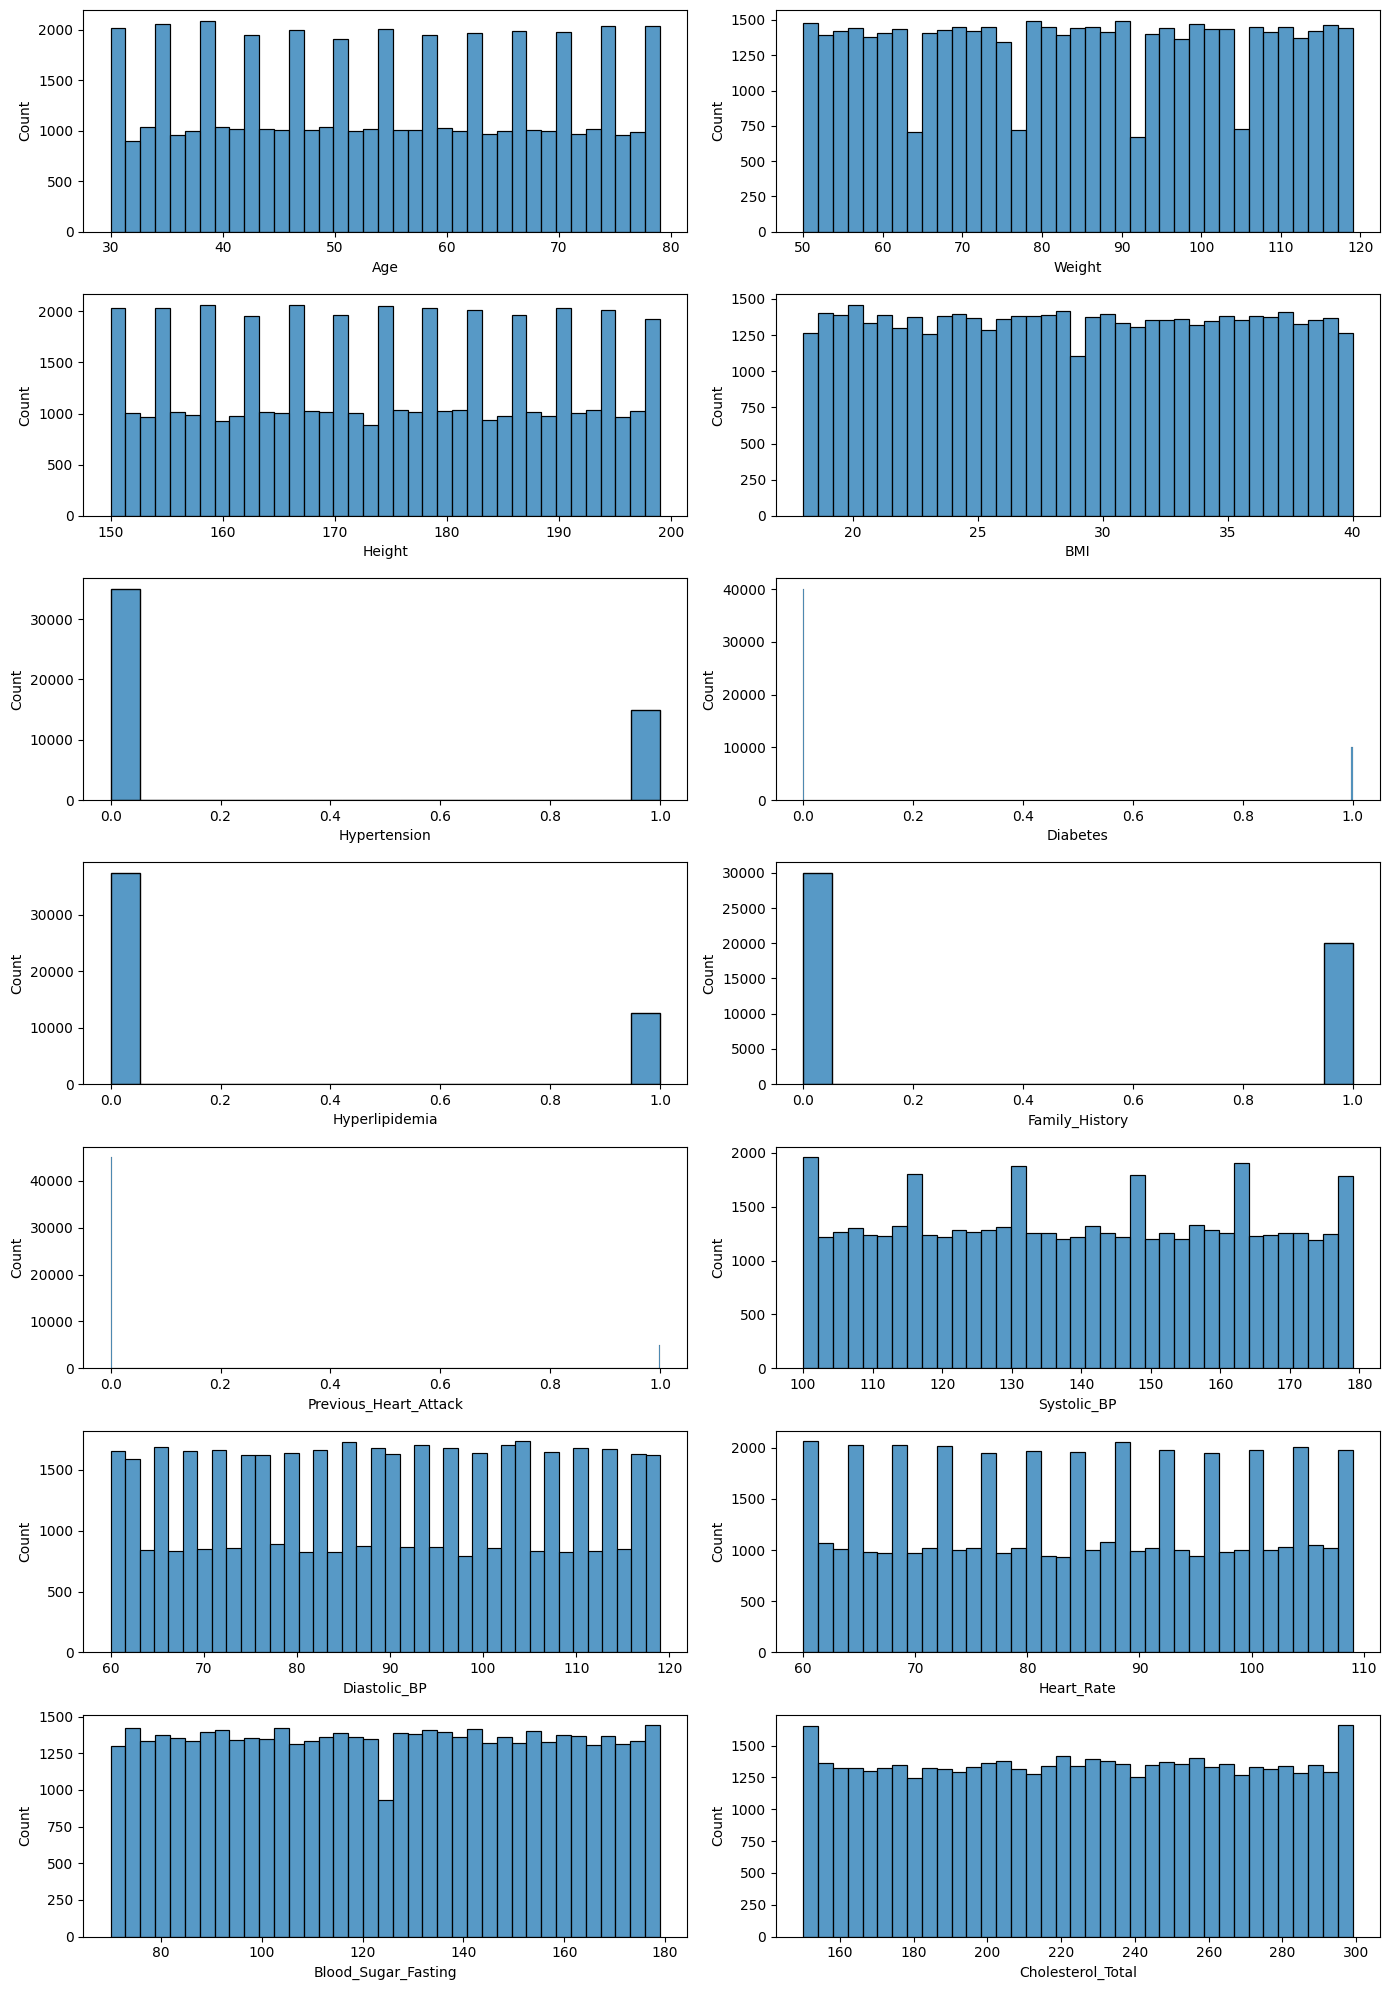

In [36]:
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7,2)

linha = 0
coluna = 0
for i in variaveis_numericas[:14]: 
    sns.histplot(data=heart, x=i, ax=axes[linha][coluna])
    coluna +=1
    if coluna==2:
        linha+=1
        coluna=0

plt.show()

In [37]:
# Carregando variaveis categoricas para LbelEncoder

variaveis_categoricas=[]
for i in heart.columns[0:20].tolist():
    if heart.dtypes[i] == 'category':
        variaveis_categoricas.append(i)

In [38]:
variaveis_categoricas

['Gender', 'Smoking', 'Physical_Activity', 'Diet', 'Stress_Level']

## TRATAMENDO DOS DADOS



In [39]:
# Cria o encoder e aplica LabeltEncoder

lb = LabelEncoder()
for i in variaveis_categoricas:
    heart[i] = lb.fit_transform(heart[i])

In [40]:
# Verificando novamente para confirmar se após transformação surgiu algum valor nulo

heart.isnull().sum()

Age                      0
Gender                   0
Weight                   0
Height                   0
BMI                      0
Smoking                  0
Physical_Activity        0
Diet                     0
Stress_Level             0
Hypertension             0
Diabetes                 0
Hyperlipidemia           0
Family_History           0
Previous_Heart_Attack    0
Systolic_BP              0
Diastolic_BP             0
Heart_Rate               0
Blood_Sugar_Fasting      0
Cholesterol_Total        0
Heart_Disease            0
dtype: int64

In [41]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  int64  
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  int64  
 6   Physical_Activity      50000 non-null  int64  
 7   Diet                   50000 non-null  int64  
 8   Stress_Level           50000 non-null  int64  
 9   Hypertension           50000 non-null  int64  
 10  Diabetes               50000 non-null  int64  
 11  Hyperlipidemia         50000 non-null  int64  
 12  Family_History         50000 non-null  int64  
 13  Previous_Heart_Attack  50000 non-null  int64  
 14  Systolic_BP            50000 non-null  int64  
 15  Di

In [42]:
heart.head()

,Age,Gender,Weight,Height,BMI,Smoking,Physical_Activity,Diet,Stress_Level,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,1,78,157,26.40,2,2,1,2,0,0,1,1,0,104,99,71,165,200,0
1,35,0,73,163,33.00,2,0,0,0,1,0,1,1,0,111,72,60,145,206,0
2,79,0,88,152,32.30,2,1,0,2,0,0,0,1,0,116,102,78,148,208,0
3,75,1,106,171,37.40,2,1,0,1,0,0,1,0,0,171,92,109,105,290,1
4,34,0,65,191,18.50,0,2,1,1,1,1,0,0,0,164,67,108,116,220,1


In [43]:
# Visualiznado a quantidade da variavel target para balanceamento

variavel_target = heart.Heart_Disease.value_counts()
variavel_target

Heart_Disease
0    26827
1    23173
Name: count, dtype: int64

In [44]:
#Separando variaveis preditoras e target

preditoras = heart.iloc[:, 0:19]
target = heart.iloc[:, 19]

In [45]:
preditoras.head()

,Age,Gender,Weight,Height,BMI,Smoking,Physical_Activity,Diet,Stress_Level,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total
0,48,1,78,157,26.40,2,2,1,2,0,0,1,1,0,104,99,71,165,200
1,35,0,73,163,33.00,2,0,0,0,1,0,1,1,0,111,72,60,145,206
2,79,0,88,152,32.30,2,1,0,2,0,0,0,1,0,116,102,78,148,208
3,75,1,106,171,37.40,2,1,0,1,0,0,1,0,0,171,92,109,105,290
4,34,0,65,191,18.50,0,2,1,1,1,1,0,0,0,164,67,108,116,220


In [46]:
target.head()

0    0
1    0
2    0
3    1
4    1
Name: Heart_Disease, dtype: int64

In [47]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Criando o balanceador SMOTE
balance = SMOTE(random_state = seed)

# Aplicando o balanceador
preditoras_RES, target_RES = balance.fit_resample(preditoras, target)


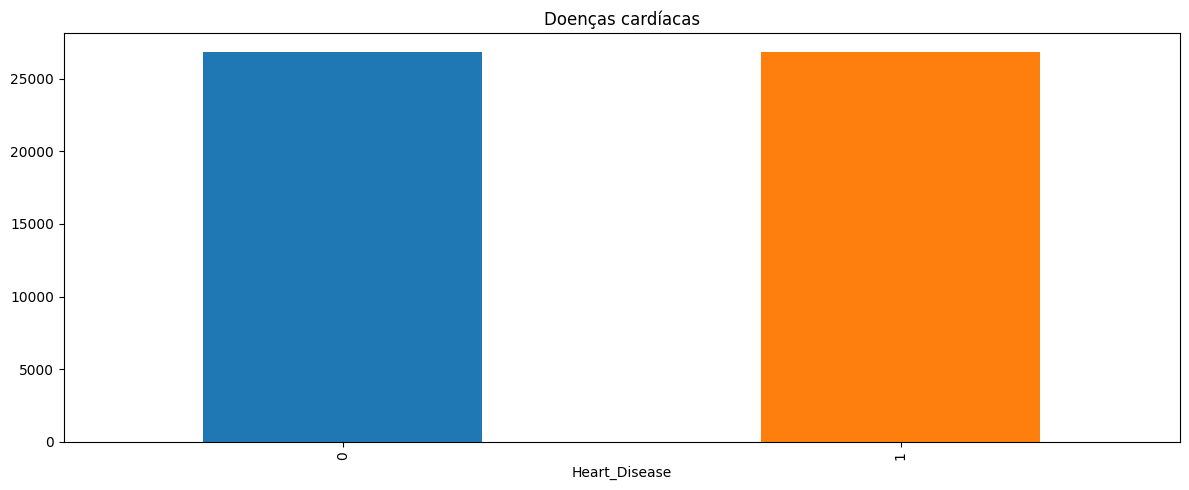

In [48]:
# Visualizando o balanceamento da variável TARGET

plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
target_RES.value_counts().plot(kind='bar', title='Doenças cardíacas', color=plt.get_cmap('tab10').colors);

In [49]:
# Visualiznado a quantidade da variavel target para balanceamento

variavel_target = target_RES.value_counts()
variavel_target

Heart_Disease
0    26827
1    26827
Name: count, dtype: int64

In [50]:
#Quantidade de registros após do balanceamento

preditoras_RES.shape

(53654, 19)

In [51]:
# Quantidade de registros após do balanceamento

target_RES.shape

(53654,)

In [52]:
# Divisão em Dados de Treino e Teste

x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras_RES, target_RES, test_size=0.3, random_state=42)

In [53]:
x_treino.shape

(37557, 19)

In [54]:
x_treino.head()

,Age,Gender,Weight,Height,BMI,Smoking,Physical_Activity,Diet,Stress_Level,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total
6375,69,1,112,193,30.30,0,1,0,2,0,0,1,1,0,145,97,104,104,151
46637,38,1,107,195,20.50,2,1,0,2,0,0,1,0,0,179,100,74,79,220
45107,45,0,105,175,24.00,0,1,0,1,0,0,0,1,0,170,104,66,117,152
34115,67,0,76,156,20.80,1,1,1,2,0,0,0,1,0,154,102,104,70,223
50673,65,0,80,177,28.42,0,1,1,2,0,0,0,0,0,120,86,72,155,173


In [55]:
# Normalização das Variáveis

normalizador = MinMaxScaler()
x_treino_normalizado = normalizador.fit_transform(x_treino)
x_teste_normalizado = normalizador.fit_transform(x_teste)


In [56]:
x_treino_normalizado.shape

(37557, 19)

In [57]:
# Visualizando os dados NORMALIZADOS

x_treino_normalizado

array([[0.79591837, 1.        , 0.89855072, ..., 0.89795918, 0.31192661,
        0.00671141],
       [0.16326531, 1.        , 0.82608696, ..., 0.28571429, 0.08256881,
        0.46979866],
       [0.30612245, 0.        , 0.79710145, ..., 0.12244898, 0.43119266,
        0.01342282],
       ...,
       [0.46938776, 1.        , 0.76811594, ..., 0.44897959, 0.        ,
        0.63758389],
       [0.46938776, 0.        , 0.76811594, ..., 0.34693878, 0.7706422 ,
        0.39597315],
       [0.24489796, 1.        , 0.24637681, ..., 0.59183673, 0.42201835,
        0.83892617]], shape=(37557, 19))

In [58]:
x_teste_normalizado.shape

(16097, 19)

In [59]:
x_teste_normalizado

array([[0.63265306, 0.        , 0.68115942, ..., 0.3877551 , 0.75229358,
        0.71812081],
       [0.40816327, 1.        , 0.14492754, ..., 0.04081633, 0.57798165,
        0.75167785],
       [0.65306122, 0.        , 0.37681159, ..., 0.97959184, 0.49541284,
        0.74496644],
       ...,
       [0.53061224, 0.        , 0.91304348, ..., 0.20408163, 0.72477064,
        0.60402685],
       [0.81632653, 1.        , 0.65217391, ..., 0.95918367, 0.40366972,
        0.54362416],
       [0.97959184, 0.        , 0.73913043, ..., 0.12244898, 0.94495413,
        0.77181208]], shape=(16097, 19))

## AVALIANDO ALGORITMOS PARA MACHINE LEARNIG

**Serão avaliados**

SVC,
LogisticRegression,
DecisionTreeClassifier,
XGBClassifier,
LGBMClassifier,
GradientBoostingClassifier,
KNeighborsClassifier,
MLPClassifier,
RandomForestClassifier,

In [60]:
svc = SVC()

In [61]:
svc = svc.fit(x_treino_normalizado, y_treino)

In [101]:
accuracy = svc.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = svc.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.9203578306516742
[[7427  703]
 [ 579 7388]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8130
           1       0.91      0.93      0.92      7967

    accuracy                           0.92     16097
   macro avg       0.92      0.92      0.92     16097
weighted avg       0.92      0.92      0.92     16097



In [102]:
lr = LogisticRegression()

In [103]:
lr = lr.fit(x_treino_normalizado, y_treino)

In [104]:
accuracy = lr.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = lr.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.9051376032801143
[[7254  775]
 [ 752 7316]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8029
           1       0.90      0.91      0.91      8068

    accuracy                           0.91     16097
   macro avg       0.91      0.91      0.91     16097
weighted avg       0.91      0.91      0.91     16097



In [105]:
dt = DecisionTreeClassifier()

In [106]:
dt = dt.fit(x_treino_normalizado, y_treino)

In [107]:
accuracy = dt.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = dt.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.9594334348015158
[[7621  268]
 [ 385 7823]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7889
           1       0.97      0.95      0.96      8208

    accuracy                           0.96     16097
   macro avg       0.96      0.96      0.96     16097
weighted avg       0.96      0.96      0.96     16097



In [108]:
xgbc = XGBClassifier()

In [109]:
xgbc = xgbc.fit(x_treino_normalizado, y_treino)

In [110]:
accuracy = xgbc.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = xgbc.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.9785053115487358
[[7965  305]
 [  41 7786]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      8270
           1       0.96      0.99      0.98      7827

    accuracy                           0.98     16097
   macro avg       0.98      0.98      0.98     16097
weighted avg       0.98      0.98      0.98     16097



In [111]:
lgbmc = LGBMClassifier()

In [112]:
lgbmc = lgbmc.fit(x_treino_normalizado, y_treino)

[LightGBM] [Info] Number of positive: 18736, number of negative: 18821
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 37557, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498868 -> initscore=-0.004526
[LightGBM] [Info] Start training from score -0.004526


In [113]:
accuracy = lgbmc.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = lgbmc.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.97900229856495
[[7966  298]
 [  40 7793]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8264
           1       0.96      0.99      0.98      7833

    accuracy                           0.98     16097
   macro avg       0.98      0.98      0.98     16097
weighted avg       0.98      0.98      0.98     16097



In [114]:
gb = GradientBoostingClassifier()

In [115]:
gb = gb.fit(x_treino_normalizado, y_treino)

In [116]:
accuracy = gb.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = gb.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.9792507920730571
[[8006  334]
 [   0 7757]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8340
           1       0.96      1.00      0.98      7757

    accuracy                           0.98     16097
   macro avg       0.98      0.98      0.98     16097
weighted avg       0.98      0.98      0.98     16097



In [117]:
kn = KNeighborsClassifier()

In [118]:
kn = kn.fit(x_treino_normalizado, y_treino)

In [119]:
accuracy = kn.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = kn.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.8625830900167734
[[6913 1119]
 [1093 6972]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      8032
           1       0.86      0.86      0.86      8065

    accuracy                           0.86     16097
   macro avg       0.86      0.86      0.86     16097
weighted avg       0.86      0.86      0.86     16097



In [120]:
mlpc = MLPClassifier()

In [121]:
mlpc = mlpc.fit(x_treino_normalizado, y_treino)

In [122]:
accuracy = mlpc.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = mlpc.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.9677579673231037
[[7909  422]
 [  97 7669]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8331
           1       0.95      0.99      0.97      7766

    accuracy                           0.97     16097
   macro avg       0.97      0.97      0.97     16097
weighted avg       0.97      0.97      0.97     16097



In [123]:
rf = RandomForestClassifier()

In [124]:
rf = rf.fit(x_treino_normalizado, y_treino)

In [125]:
accuracy = rf.score(x_teste_normalizado, y_teste)
print("accuracy: " + str(accuracy))

prediction = rf.predict(x_teste_normalizado)

cm = confusion_matrix(prediction, y_teste)
cr = classification_report(prediction, y_teste)

print(cm)
print(cr)

accuracy: 0.9796856557122445
[[8004  325]
 [   2 7766]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8329
           1       0.96      1.00      0.98      7768

    accuracy                           0.98     16097
   macro avg       0.98      0.98      0.98     16097
weighted avg       0.98      0.98      0.98     16097



## RESULTADO DOS ALGORITMOS 

ALGORITMOS                        ACCURACY     F1_SCORE

SVC                                92,03%         92%
LogisticRegression                 90,51%         90%
DecisionTreeClassifier             95,96%         96%
XGBClassifier                      97,85%         98%
LGBMClassifier                     97,90%         98%
GradientBoostingClassifier         97,92%         98%
KNeighborsClassifier               86,85%         86%
MLPClassifier                      96,66%         96%
RandomForestClassifier             97,96%         98%

**Melhor desempenho**: GradientBoostingClassifier, RandomForestClassifier

## MODELO PREDITIVO

In [126]:
#Iniciando testes com hiperparâmetros

rf_base = RandomForestClassifier()

In [127]:
rf_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [128]:
n_estimator = np.array([100,150,200])
max_depth = np.array([10,20])
min_samples_split = np.array([2,5])
min_samples_leaf = np.array([1,2])
criterion = np.array(['gini', 'entropy'])
max_features = np.array(['sqrt', 'log2'])
bootstrap = np.array([True])

params_grid = dict(n_estimators = n_estimator,
                   max_depth = max_depth,
                   min_samples_split = min_samples_split,
                   criterion = criterion,
                   max_features = max_features,
                   bootstrap = bootstrap)

random_search = RandomizedSearchCV( estimator = rf_base,
                                    param_distributions = params_grid,
                                    n_iter = 5,
                                    cv = 3,
                                    scoring = 'accuracy',
                                    n_jobs = -1,
                                    random_state = 42,
                                    verbose = 2)

inicio = time.time()
random_search.fit(x_treino_normalizado, y_treino)
fim = time.time()

treinos_rf = pd.DataFrame(random_search.cv_results_)

print(f"Accuracy em treino: {random_search.best_score_ :.2%}")
print(f"Hipepârametros ideais: {random_search.best_params_}")
print("Tempo de treino: ", round(fim-inicio,2))
print("Quantidade de treinos realizados: ", treinos_rf.shape[0])


                   
                   

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Accuracy em treino: 97.99%
Hipepârametros ideais: {'n_estimators': np.int64(150), 'min_samples_split': np.int64(2), 'max_features': np.str_('log2'), 'max_depth': np.int64(20), 'criterion': np.str_('entropy'), 'bootstrap': np.True_}
Tempo de treino:  35.51
Quantidade de treinos realizados:  5


In [129]:
n_estimator = np.array([130,150,170])
max_depth = np.array([18,20,22])
min_samples_split = np.array([2,3])
min_samples_leaf = np.array([1,2])
criterion = np.array(['entropy'])
max_features = np.array(['log2'])
bootstrap = np.array([True])

params_grid2 = dict(n_estimators = n_estimator,
                   max_depth = max_depth,
                   min_samples_split = min_samples_split,
                   criterion = criterion,
                   max_features = max_features,
                   bootstrap = bootstrap)

random_search2 = RandomizedSearchCV( estimator = rf_base,
                                    param_distributions = params_grid,
                                    n_iter = 10,
                                    cv = 3,
                                    scoring = 'accuracy',
                                    n_jobs = -1,
                                    random_state = 42,
                                    verbose = 2)

inicio2 = time.time()
random_search2.fit(x_treino_normalizado, y_treino)
fim2 = time.time()

treinos_rf2 = pd.DataFrame(random_search2.cv_results_)

print(f"Accuracy em treino: {random_search2.best_score_ :.2%}")
print(f"Hipepârametros ideais: {random_search2.best_params_}")
print("Tempo de treino: ", round(fim2-inicio2,2))
print("Quantidade de treinos realizados: ", treinos_rf2.shape[0])


                   
                   

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy em treino: 97.99%
Hipepârametros ideais: {'n_estimators': np.int64(150), 'min_samples_split': np.int64(2), 'max_features': np.str_('log2'), 'max_depth': np.int64(20), 'criterion': np.str_('entropy'), 'bootstrap': np.True_}
Tempo de treino:  38.64
Quantidade de treinos realizados:  10


In [130]:
n_estimator = np.array([150])
max_depth = np.array([20])
min_samples_split = np.array([2])
min_samples_leaf = np.array([1,2])
criterion = np.array(['entropy'])
max_features = np.array(['log2'])
bootstrap = np.array([True])

params_grid3 = dict(n_estimators = n_estimator,
                   max_depth = max_depth,
                   min_samples_split = min_samples_split,
                   criterion = criterion,
                   max_features = max_features,
                   bootstrap = bootstrap)

random_search3 = RandomizedSearchCV( estimator = rf_base,
                                    param_distributions = params_grid,
                                    n_iter = 30,
                                    cv = 3,
                                    scoring = 'accuracy',
                                    n_jobs = -1,
                                    random_state = 42,
                                    verbose = 2)

inicio2 = time.time()
random_search3.fit(x_treino_normalizado, y_treino)
fim2 = time.time()

treinos_rf3 = pd.DataFrame(random_search3.cv_results_)

print(f"Accuracy em treino: {random_search3.best_score_ :.2%}")
print(f"Hipepârametros ideais: {random_search3.best_params_}")
print("Tempo de treino: ", round(fim2-inicio2,2))
print("Quantidade de treinos realizados: ", treinos_rf3.shape[0])



Fitting 3 folds for each of 30 candidates, totalling 90 fits
Accuracy em treino: 98.00%
Hipepârametros ideais: {'n_estimators': np.int64(150), 'min_samples_split': np.int64(2), 'max_features': np.str_('log2'), 'max_depth': np.int64(20), 'criterion': np.str_('entropy'), 'bootstrap': np.True_}
Tempo de treino:  110.09
Quantidade de treinos realizados:  30


In [131]:
#Hiperparâmetros definidos

model = RandomForestClassifier(n_estimators=150, 
                               criterion='gini', 
                               max_depth=20, 
                               max_features='sqrt',
                               min_samples_split=5,
                               n_jobs=-1)

model = model.fit(x_treino_normalizado, y_treino)

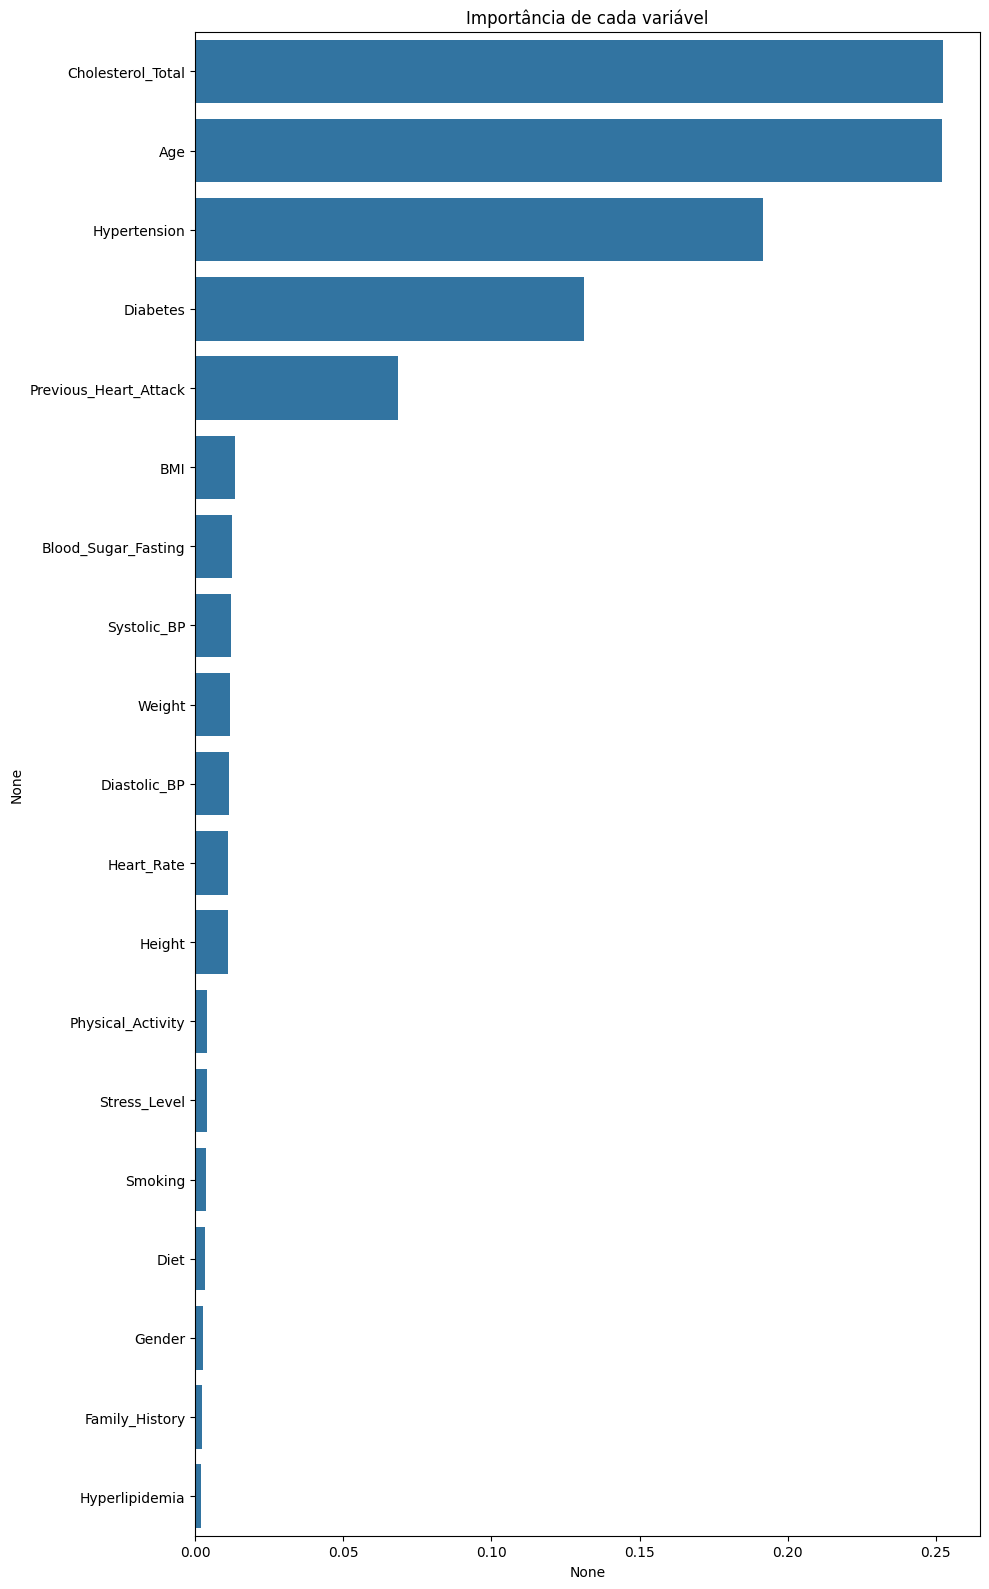

Cholesterol_Total       0.25
Age                     0.25
Hypertension            0.19
Diabetes                0.13
Previous_Heart_Attack   0.07
BMI                     0.01
Blood_Sugar_Fasting     0.01
Systolic_BP             0.01
Weight                  0.01
Diastolic_BP            0.01
Heart_Rate              0.01
Height                  0.01
Physical_Activity       0.00
Stress_Level            0.00
Smoking                 0.00
Diet                    0.00
Gender                  0.00
Family_History          0.00
Hyperlipidemia          0.00
dtype: float64

In [132]:
# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00,16.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=model.feature_importances_, index=preditoras.columns)
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title("Importância de cada variável")
plt.show()

# Visualizando o percentual de importancia de cada variável
importances.sort_values(ascending=False)

In [133]:
# "Simulando" os dados de treino

model.score(x_treino_normalizado,y_treino)


0.9916926272066459

In [134]:
# "Simulando" os dados de teste

model.score(x_teste_normalizado, y_teste)

0.9792507920730571

In [135]:
y_pred = model.predict(x_teste_normalizado)
print(accuracy_score(y_teste, y_pred)*100)

97.92507920730571


In [136]:
classification_report(y_teste, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98      8006\n           1       1.00      0.96      0.98      8091\n\n    accuracy                           0.98     16097\n   macro avg       0.98      0.98      0.98     16097\nweighted avg       0.98      0.98      0.98     16097\n'

In [137]:
# Vizualindo a confusão de matriz

cm = confusion_matrix(y_teste, y_pred)
cm



array([[8004,    2],
       [ 332, 7759]])

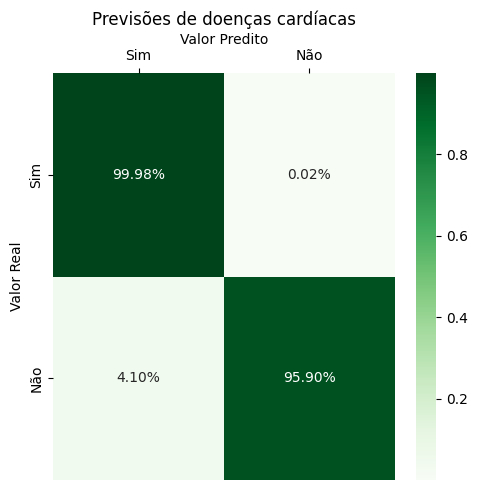

In [141]:
# Vizualindo a confusão de matriz através de grafico

pd.options.display.float_format = '{:.2f}'.format

plt.rcParams["figure.figsize"] = [5.00,5.00]
plt.rcParams["figure.autolayout"] = True

f, ax = plt.subplots(figsize=(5,5))

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm,
            cmap="Greens",
            annot=True,
            cbar_kws={"orientation":"vertical"},
            fmt=".2%",
            xticklabels=["Sim","Não"],
            yticklabels=["Sim","Não"])
        
ax.set_ylabel('Valor Real')  
ax.set_xlabel('Valor Predito') 

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title("Previsões de doenças cardíacas")
plt.tick_params(axis='both',
                which='major',
                labelsize=10,
                labelbottom=False,
                bottom=False,
                top=True,
                labeltop=True)

plt.show()

## CONCLUSÃO

O modelo criado pelo algoritmo RandomForest tem acurácia de **97,95%**


Matriz de confusão:

99,98% verdadeiro positivo

95,90% verdadeiro negativo

0,02% falso positivo

4,10% falso negativo